In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from keras import models, layers
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2023-03-19 22:35:05.742483: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-19 22:35:05.811128: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-19 22:35:05.813206: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-19 22:35:05.813216: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudar

<h1 style="background-color:#DC143C; font-family:'Brush Script MT',cursive;color:white;font-size:200%; text-align:center;border-radius: 50% 20% / 10% 40%">Explainable AI (XAI) program</h1>

The Explainable AI (XAI) program aims to create a suite of machine learning techniques that:

Produce more explainable models, while maintaining a high level of learning performance (prediction accuracy); and

Enable human users to understand, appropriately trust, and effectively manage the emerging generation of artificially intelligent partners.

https://www.darpa.mil/program/explainable-artificial-intelligence

![](https://www.darpa.mil/ddm_gallery/xai-figure1-inline-graphic.png)darpa.mil

#Code by JeongBin Park https://www.kaggle.com/jeongbinpark/looking-lstm-detailly-trying-xai/notebook

In [2]:
best_font = fm.FontProperties(fname='../input/cusersmarildownloadsstaatlichesstaatttf/staat.ttf')

In [3]:
#Code by JeongBin Park https://www.kaggle.com/jeongbinpark/looking-lstm-detailly-trying-xai/notebook

df = pd.read_csv('./tripadvisor_hotel_reviews.csv')
df = df[['Review','Rating']]
df = df.dropna()
### I changed positive's sample count !  The original was sample 2370
positive = df[(df['Rating'] == 5)].sample(3214,random_state=100)
negative = df[(df['Rating'] == 2) | (df['Rating'] == 1)]
df = pd.concat([negative,positive])
df = df.reset_index(drop=True)

df['Rating'] = df['Rating'].apply(lambda x : 1 if x==5 else 0)

In [4]:
df.tail()

,Review,Rating
6423,"classy hotel took wife american long weekend, ...",1
6424,not bad word say excellence husband stayed exc...,1
6425,"treat good room glimpse bridge, thought room, ...",1
6426,"loved stayed 2 weeks march wonderful, checkin ...",1
6427,"loved minute stay, san francisco conference da...",1


#The positive sample above was changed from that Rating value below.

In [5]:
df['Rating'].value_counts()

0    3214
1    3214
Name: Rating, dtype: int64

#Above rating  mean that 0 is Negative review, and 1 is Positive review

In [6]:
#Code by JeongBin Park https://www.kaggle.com/jeongbinpark/looking-lstm-detailly-trying-xai/notebook

import nltk
nltk.download('stopwords')
nltk.download('punkt')

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

def df_processing(text):
    return_arr = []
    text = re.sub(r"[^a-zA-Z]"," ",text)
    text = re.sub(r" {2,}"," ",text)
    text = text.lower()
    words = word_tokenize(text)
    s = PorterStemmer()
    stopword = stopwords.words('english')
    for t in words:
        if t not in stopword:
            return_arr.append(t)
            
    return_arr = [s.stem(w) for w in return_arr]
    return return_arr

df['processing'] = df['Review'].apply(df_processing)

[nltk_data] Downloading package stopwords to /home/kiwi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/kiwi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Only use alphabet text, (delete special character or number). And, delete stopwords, changing analogous term.

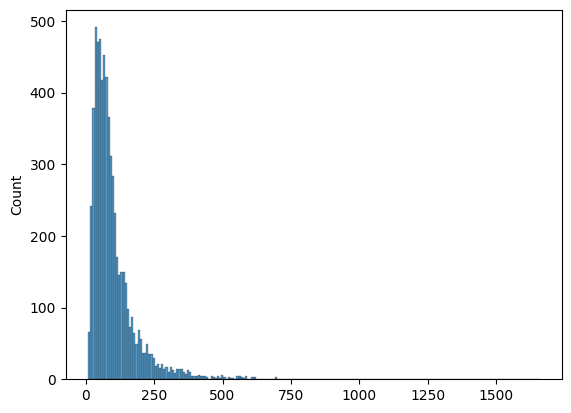

In [7]:
#Code by JeongBin Park https://www.kaggle.com/jeongbinpark/looking-lstm-detailly-trying-xai/notebook

len_arr = []
for i in range(len(df)):
    len_arr.append(len(df.loc[i,'processing']))
    
import seaborn as sns
sns.histplot(len_arr);

#On the chart above the distribution goes almost till 250. That's why I choose that number 

to write on that line: X = X.loc[:,:250]

In [8]:
#X = pd.DataFrame(X)
#X = X.fillna(0)
#X = X.loc[:,:250]
#X= X.to_numpy()
#y = np.array(df['Rating'])
#X = X.reshape(5584,251,1)
#X.shape, y.shape

In [9]:
df

,Review,Rating,processing
0,ok nothing special charge diamond member hilto...,0,"[ok, noth, special, charg, diamond, member, hi..."
1,"poor value stayed monaco seattle july, nice ho...",0,"[poor, valu, stay, monaco, seattl, juli, nice,..."
2,horrible customer service hotel stay february ...,0,"[horribl, custom, servic, hotel, stay, februar..."
3,disappointed say anticipating stay hotel monac...,0,"[disappoint, say, anticip, stay, hotel, monaco..."
4,great location need internally upgrade advanta...,0,"[great, locat, need, intern, upgrad, advantag,..."
...,...,...,...
6423,"classy hotel took wife american long weekend, ...",1,"[classi, hotel, took, wife, american, long, we..."
6424,not bad word say excellence husband stayed exc...,1,"[bad, word, say, excel, husband, stay, excel, ..."
6425,"treat good room glimpse bridge, thought room, ...",1,"[treat, good, room, glimps, bridg, thought, ro..."
6426,"loved stayed 2 weeks march wonderful, checkin ...",1,"[love, stay, week, march, wonder, checkin, sta..."


In [10]:
#Code by JeongBin Park https://www.kaggle.com/jeongbinpark/looking-lstm-detailly-trying-xai/notebook

def df_processing2(text):
    return_arr = []
    text = re.sub(r"[^a-z]"," ",text)
    text = re.sub(r" {2,}"," ",text)
    return text

negative_sentences = df[df['Rating'] ==0]['processing']
positive_sentences = df[df['Rating'] ==1]['processing']

negative_sentences = str(list(negative_sentences))
negative_sentences = df_processing2(negative_sentences)

negative_sentences = negative_sentences.split(' ')
negative_sentences = pd.DataFrame(negative_sentences)[0].value_counts()
negative_sentences = pd.DataFrame(negative_sentences)

positive_sentences = str(list(positive_sentences))
positive_sentences = df_processing2(positive_sentences)

positive_sentences = positive_sentences.split(' ')
positive_sentences = pd.DataFrame(positive_sentences)[0].value_counts()
positive_sentences = pd.DataFrame(positive_sentences)

con = pd.concat([negative_sentences,positive_sentences],axis=1)

con.columns = ['negative','positive']

con = con.dropna()

con['negative_value'] = con[['negative','positive']].apply(lambda x : x[0]/(x[0]+x[1]) *-1,axis=1)
con['positive_value'] = con[['negative','positive']].apply(lambda x : x[1]/(x[0]+x[1]),axis=1)

con['total_value'] = con['negative_value'] + con['positive_value']
con = con.reset_index()
con = con.drop(['negative','positive','negative_value','positive_value'],axis=1)
word_index =con['index'].to_list()
con = np.array(con)

In [11]:
#Code by JeongBin Park https://www.kaggle.com/jeongbinpark/looking-lstm-detailly-trying-xai/notebook

from tqdm import tqdm

X = []
for sen in tqdm(df['processing']):
    word_arr =[]
    for word in sen:
        if word in word_index:
            word_arr.append(float(con[con[:,0] ==word,1]))
        else:
            word_arr.append(0)
    X.append(word_arr)

 46%|████▌     | 2951/6428 [00:27<00:30, 113.18it/s]

Just applied, rate of Negative words, and positive words. Which means:

Negative Rate : -1 * Negatvie Counts / (Negative Counts + Positive Counts)

Positive Rate : 1 * Positive Counts / (Negative Counts + Positive Counts)

After Sum Two : Negative Rate + Positive Rate

#Above it's 6428, (tail is 6428), hence change below the original code X = X.reshape(4740,51,1)  to 6428 

#Then the reshape was changed to X = X.reshape(-1,251,1)

In [ ]:
#To write 250 I checked on the histplot len array some snippets above.

#Code by JeongBin Park https://www.kaggle.com/jeongbinpark/looking-lstm-detailly-trying-xai/notebook

X = pd.DataFrame(X)
X = X.fillna(0)
X = X.loc[:,:250]
X= X.to_numpy()
y = np.array(df['Rating'])
#X = X.reshape(6428,251,1)  That was the original reshape
X = X.reshape(-1,251,1)
X.shape, y.shape

((6428, 251, 1), (6428,))

#There was a fit error, fixed by Jeong

#So, he changed Activation function, and optimizer's learning rate

In [ ]:
#There was a fit error, fixed by JeongBin Park. Change Activation function and optimizer learning rate.

#from tensorflow.keras.layers import Embedding, Dense,LSTM
#from tensorflow.keras.models import Sequential

#model = Sequential()
#model.add(LSTM(251,input_shape=X.shape[1:],activation='relu'))
#model.add(Dense(1, activation='sigmoid'))
#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
#model.summary()

In [ ]:
#Code by JeongBin Park https://www.kaggle.com/jeongbinpark/looking-lstm-detailly-trying-xai/notebook

from tensorflow.keras.layers import Embedding, Dense,LSTM
from tensorflow.keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(LSTM(251,input_shape=X.shape[1:]))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.00003),
              loss='binary_crossentropy', metrics=['acc'])

model.fit(X,y, batch_size=256, epochs=20, validation_split=0.3)

Epoch 1/20


2023-03-19 22:26:01.955665: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-19 22:26:01.955681: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-19 22:26:01.955692: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kiwi-MS-7D42): /proc/driver/nvidia/version does not exist
2023-03-19 22:26:01.955817: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


18/18 [==============================] - 10s 497ms/step - loss: 0.6906 - acc: 0.7119 - val_loss: 0.7031 - val_acc: 0.0036
Epoch 2/20
18/18 [==============================] - 9s 489ms/step - loss: 0.6857 - acc: 0.7150 - val_loss: 0.7161 - val_acc: 0.0016
Epoch 3/20
18/18 [==============================] - 8s 475ms/step - loss: 0.6775 - acc: 0.7150 - val_loss: 0.7457 - val_acc: 0.0000e+00
Epoch 4/20
18/18 [==============================] - 9s 485ms/step - loss: 0.6381 - acc: 0.7144 - val_loss: 1.0659 - val_acc: 0.0000e+00
Epoch 5/20
18/18 [==============================] - 9s 495ms/step - loss: 0.4598 - acc: 0.7144 - val_loss: 1.2136 - val_acc: 0.0000e+00
Epoch 6/20
18/18 [==============================] - 9s 497ms/step - loss: 0.4182 - acc: 0.7144 - val_loss: 1.2333 - val_acc: 5.1840e-04
Epoch 7/20
18/18 [==============================] - 9s 492ms/step - loss: 0.4009 - acc: 0.7144 - val_loss: 1.2177 - val_acc: 5.1840e-04
Epoch 8/20
18/18 [==============================] - 9s 484ms/step 

#Jeong showed performance that 92% val_accuracy. I got 0.9150

Jeong's result: 

Epoch 20/20
18/18 [==============================] - 1s 50ms/step - loss: 0.2188 - acc: 0.9316 - val_loss: 0.3849 - val_acc: 0.9378

Even copying his snippets I got less accuracy.

#A simple LSTM Model

In [ ]:
#Code by JeongBin Park https://www.kaggle.com/jeongbinpark/looking-lstm-detailly-trying-xai/notebook

names = [weight.name for layer in model.layers for weight in layer.weights]
weights = model.get_weights()

kernel_weights = weights[0]
recurrent_kernel_weights = weights[1]
bias = weights[2]

n = 1
units = 251  # LSTM layers  

Wi = kernel_weights[:, 0:units]
Wf = kernel_weights[:, units:2 * units]
Wc = kernel_weights[:, 2 * units:3 * units]
Wo = kernel_weights[:, 3 * units:]


Ui = recurrent_kernel_weights[:, 0:units]
Uf = recurrent_kernel_weights[:, units:2 * units]
Uc = recurrent_kernel_weights[:, 2 * units:3 * units]
Uo = recurrent_kernel_weights[:, 3 * units:]


bi = bias[0:units]
bf = bias[units:2 * units]
bc = bias[2 * units:3 * units]
bo = bias[3 * units:]

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
#Code by JeongBin Park https://www.kaggle.com/jeongbinpark/looking-lstm-detailly-trying-xai/notebook

# def make_plot(number):

#     ht_1 = np.zeros(n * units).reshape(n, units)
#     Ct_1 = np.zeros(n * units).reshape(n, units)

#     h_t_value = []

#     influence_h_t_value = []
#     for t in range(0, len(X[number,:])):
#         xt = np.array(X[number,t])
#         ft = sigmoid(np.dot(xt, Wf) + np.dot(ht_1, Uf) + bf)  # forget gate
#         influence_ft = (np.dot(ht_1, Uf))/(np.dot(xt, Wf) + np.dot(ht_1, Uf) + bf) * ft

#         it = sigmoid(np.dot(xt, Wi) + np.dot(ht_1, Ui) + bi)  # input gate
#         influence_it = (np.dot(ht_1, Ui))/(np.dot(xt, Wi) + np.dot(ht_1, Ui) + bi) * it

#         ot = sigmoid(np.dot(xt, Wo) + np.dot(ht_1, Uo) + bo)  # output gate
#         influence_ot = np.dot(ht_1, Uo) / (np.dot(xt, Wo) + np.dot(ht_1, Uo) + bo) * ot

#         gt =  np.tanh(np.dot(xt, Wc) + np.dot(ht_1, Uc) + bc)
#         influence_gt =np.dot(ht_1, Uc) / (np.dot(xt, Wc) + np.dot(ht_1, Uc) + bc) * gt

#         Ct = ft * Ct_1 + it * gt
#         influence_ct = influence_ft * Ct_1 + influence_it * influence_gt
#         ht = ot * np.tanh(Ct)
#         influence_ht = influence_ot * (influence_ct/Ct) * ht

#         influence_h_t_value.append(influence_ht)

#         ht_1 = ht  # hidden state, previous memory state
#         Ct_1 = Ct  # cell state, previous carry state

#         h_t_value.append(ht)

#     influence_h_t_value.append(h_t_value[-1])
#     for i in range(len(influence_h_t_value)-1,0,-1):
#         influence_h_t_value[i] = influence_h_t_value[i] - influence_h_t_value[i-1]

#     influence_h_t_value = influence_h_t_value[1:]

#     impact_columns = np.dot(influence_h_t_value,weights[3]) + (weights[4]/units)

#     if model.predict(X[number:number+1]) > 0.5:
#         b_color = 'lightgreen'
#     else:
#         b_color ='lightcyan'

#     fig = plt.figure(figsize=(15,3),facecolor=b_color)


#     for k in range(len(df.loc[number,'processing'])):
#         s = df.loc[number,'processing'][k]
#         va = round(float(impact_columns[k]),2)
#         if va > 0.5:
#             color ='green'
#         elif va< -0.3:
#             color ='blue'
#         else:
#             color ='black'

#         if k < 17:
#             plt.text(s=s, x=k*0.7, y=0,font=best_font,fontsize=20,color=color,va='center',ha='center')
#             plt.text(s=va,x=k*0.7, y=-0.1,font=best_font,fontsize=20,color=color,va='center',ha='center')
#         elif k < 34:
#             plt.text(s=s, x=k*0.7 - 17*0.7, y=-0.2,font=best_font,fontsize=20,color=color,va='center',ha='center')
#             plt.text(s=va,x=k*0.7- 17*0.7, y=-0.3,font=best_font,fontsize=20,color=color,va='center',ha='center')
#         else:
#             plt.text(s=s, x=k*0.7 - 34*0.7, y=-0.4,font=best_font,fontsize=20,color=color,va='center',ha='center')
#             plt.text(s=va,x=k*0.7- 34*0.7, y=-0.5,font=best_font,fontsize=20,color=color,va='center',ha='center')

#     plt.xlim(0,10)
#     plt.ylim(-0.5,0.1)
#     plt.axis('off')
#     plt.show()

If influence value is more than 0.5 : Green color. If influence value is lower than -0.5 : blue color.

The background color mean too (????). Jeong Bin Park's code didn't consider activation function like sigmoid. 

#If you want to positive predict value, you use tail number like 6427 ~ 3400

In [ ]:
# make_plot(6427)

In [ ]:
# make_plot(6000)

In [ ]:
# make_plot(220)

In [ ]:
# make_plot(200)

In [ ]:
# make_plot(216)

In [ ]:
# make_plot(120)

#That line was introduced after 27th line:   print(model.predict(X[number:number+1]))

#So it was printed the model and the number. Even the letters are less messy with just that line. 

#Much better JeongBin Park. Thank you AGAIN. 

In [ ]:
#Code by JeongBin Park https://www.kaggle.com/jeongbinpark/looking-lstm-detailly-trying-xai/notebook

def make_plot(number):
    ht_1 = np.zeros(n * units).reshape(n, units)
    Ct_1 = np.zeros(n * units).reshape(n, units)

    h_t_value = []

    influence_h_t_value = []
    for t in range(0, len(X[number,:])):
        xt = np.array(X[number,t])
        ft = sigmoid(np.dot(xt, Wf) + np.dot(ht_1, Uf) + bf)  # forget gate
        influence_ft = (np.dot(ht_1, Uf))/(np.dot(xt, Wf) + np.dot(ht_1, Uf) + bf) * ft

        it = sigmoid(np.dot(xt, Wi) + np.dot(ht_1, Ui) + bi)  # input gate
        influence_it = (np.dot(ht_1, Ui))/(np.dot(xt, Wi) + np.dot(ht_1, Ui) + bi) * it

        ot = sigmoid(np.dot(xt, Wo) + np.dot(ht_1, Uo) + bo)  # output gate
        influence_ot = np.dot(ht_1, Uo) / (np.dot(xt, Wo) + np.dot(ht_1, Uo) + bo) * ot

        gt =  np.tanh(np.dot(xt, Wc) + np.dot(ht_1, Uc) + bc)
        influence_gt =np.dot(ht_1, Uc) / (np.dot(xt, Wc) + np.dot(ht_1, Uc) + bc) * gt

        Ct = ft * Ct_1 + it * gt
        influence_ct = influence_ft * Ct_1 + influence_it * influence_gt
        ht = ot * np.tanh(Ct)
        influence_ht = influence_ot * (influence_ct/Ct) * ht

        influence_h_t_value.append(influence_ht)

        ht_1 = ht  # hidden state, previous memory state
        Ct_1 = Ct  # cell state, previous carry state

        h_t_value.append(ht)

    influence_h_t_value.append(h_t_value[-1])
    for i in range(len(influence_h_t_value)-1,0,-1):
        influence_h_t_value[i] = influence_h_t_value[i] - influence_h_t_value[i-1]

    influence_h_t_value = influence_h_t_value[1:]

    impact_columns = np.dot(influence_h_t_value,weights[3]) + (weights[4]/units)
    print(model.predict(X[number:number+1]))
    if model.predict(X[number:number+1]) > 0.5:
        b_color = 'lightgreen'
    else:
        b_color ='lightcyan'

    fig = plt.figure(figsize=(15,3),facecolor=b_color)

    for k in range(len(df.loc[number,'processing'])):
        s = df.loc[number,'processing'][k]
        va = round(float(impact_columns[k]),2)
        if va > 0.5:
            color ='green'
        elif va< -0.3:
            color ='blue'
        else:
            color ='black'

        if k < 17:
            plt.text(s=s, x=k*0.7, y=0,fontsize=14,color=color,va='center',ha='center')
            plt.text(s=va,x=k*0.7, y=-0.1,fontsize=14,color=color,va='center',ha='center')
        elif k < 34:
            plt.text(s=s, x=k*0.7 - 17*0.7, y=-0.2,fontsize=14,color=color,va='center',ha='center')
            plt.text(s=va,x=k*0.7- 17*0.7, y=-0.3,fontsize=14,color=color,va='center',ha='center')
        else:
            plt.text(s=s, x=k*0.7 - 34*0.7, y=-0.4,fontsize=14,color=color,va='center',ha='center')
            plt.text(s=va,x=k*0.7- 34*0.7, y=-0.5,fontsize=14,color=color,va='center',ha='center')

    plt.xlim(0,10)
    plt.ylim(-0.5,0.1)
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 211ms/step
[[0.83735985]]
1/1 [==============================] - 0s 15ms/step


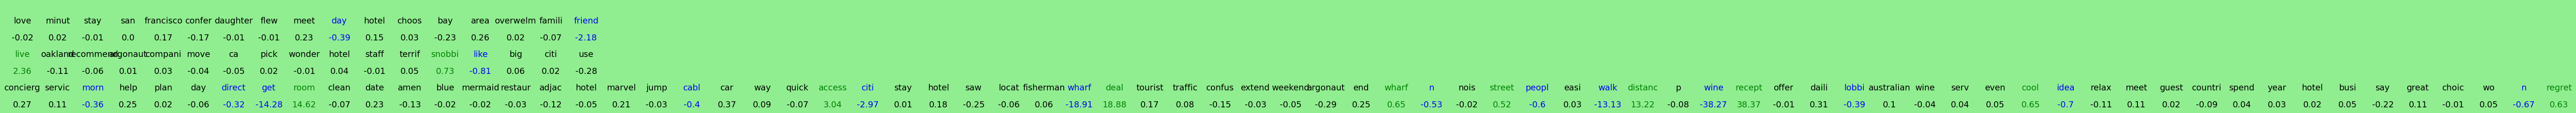

In [ ]:
make_plot(6427)

1/1 [==============================] - 0s 29ms/step
[[0.82566196]]
1/1 [==============================] - 0s 36ms/step


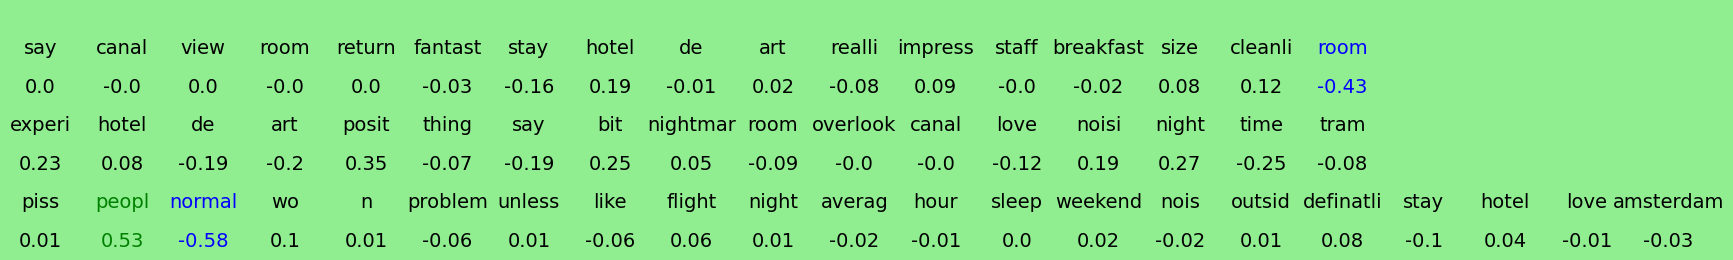

In [ ]:
make_plot(6000)

1/1 [==============================] - 0s 25ms/step
[[0.05155956]]
1/1 [==============================] - 0s 23ms/step


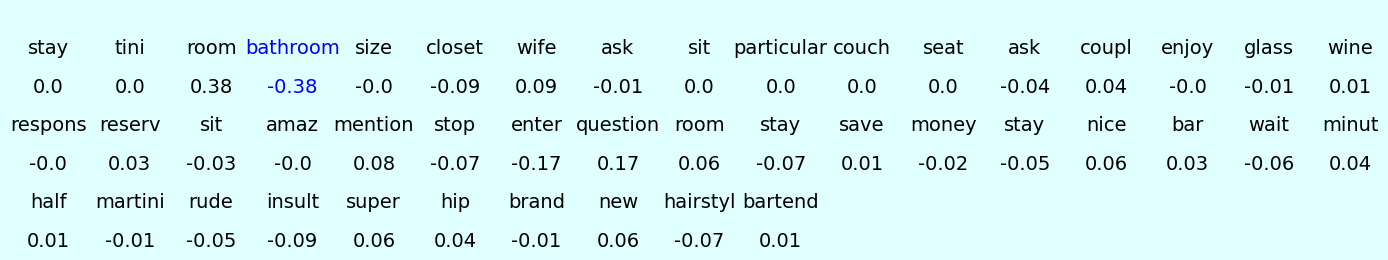

In [ ]:
make_plot(220)

1/1 [==============================] - 0s 48ms/step
[[0.04875876]]
1/1 [==============================] - 0s 25ms/step


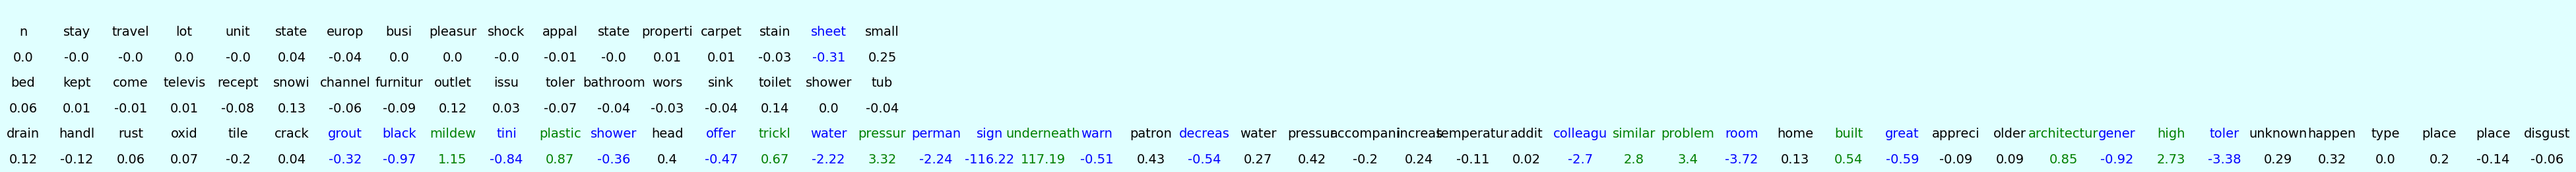

In [ ]:
make_plot(200)

1/1 [==============================] - 0s 22ms/step
[[0.04970039]]
1/1 [==============================] - 0s 37ms/step


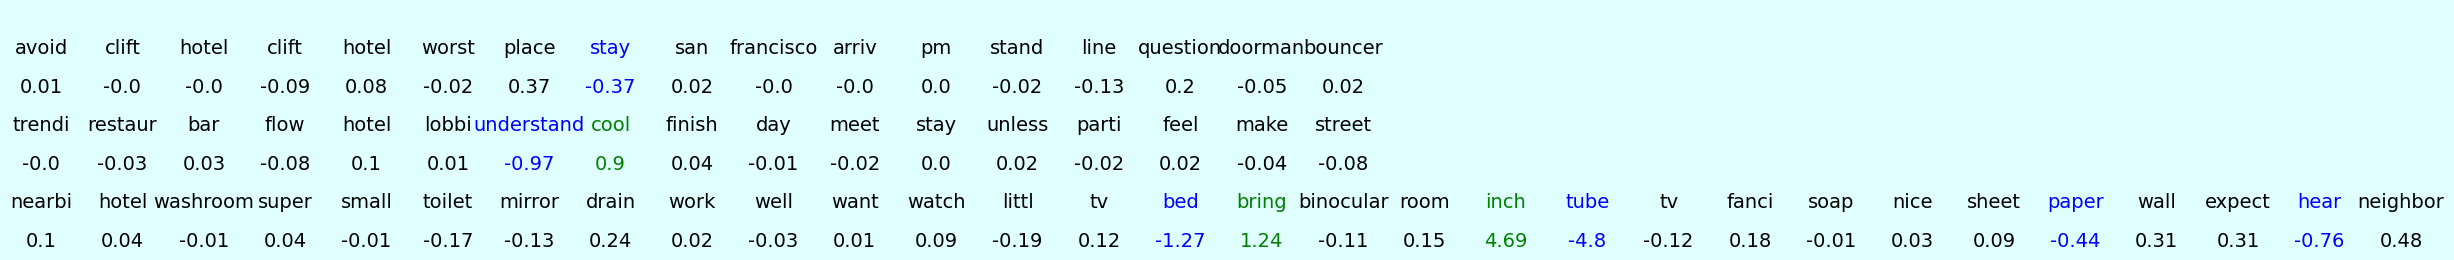

In [ ]:
make_plot(216)

1/1 [==============================] - 0s 28ms/step
[[0.04882811]]
1/1 [==============================] - 0s 29ms/step


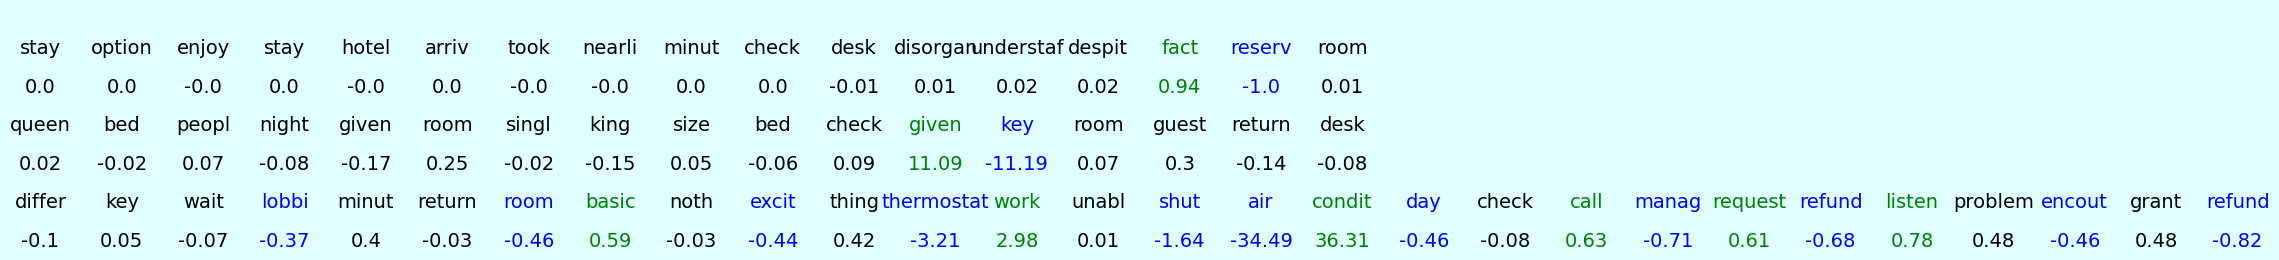

In [ ]:
make_plot(120)

#I was feeling like the User at the initial image. Thanks to Jeong (The brain behind the AI System) I'm less confused.

#Code by JeongBin_Park https://www.kaggle.com/jeongbinpark/looking-lstm-detailly-trying-xai